## `Airbnb Hosting Trends in NYC`

In [57]:
# Load packages 
import pandas as pd
import numpy as np
import datetime

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 75



In [66]:
# Loading Data 
listings = pd.read_csv('data/listings2021Dec.csv', low_memory=False)
calendar = pd.read_csv('data/calendar.csv')

### `Data Cleaning`

In [116]:
# calculating percentage of missing data for each column 
for col in listings.columns:
    pct_missing = np.mean(listings[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

listings.isnull().sum()  # removing columns that are not needed or have a high number of missing values (>30%)
listings2021 = listings.drop(['description', 'host_neighbourhood', 'neighbourhood', 'neighborhood_overview','host_name','host_about', 'bathrooms',\
               'host_acceptance_rate', 'host_verifications', 'first_review', 'last_review', 'host_has_profile_pic',\
                'host_identity_verified', 'license', 'scrape_id', 'last_scraped', 'host_url', 'host_thumbnail_url', 'host_picture_url',\
               'picture_url', 'calendar_last_scraped', 'calendar_updated', 'number_of_reviews_ltm','number_of_reviews_l30d'], axis=1)


listings2021.columns = listings2021.columns.str.replace('neighbourhood_group_cleansed', 'area')
# listings2021.price = listings2021['price'].str.strip().str.replace('[\$,]','').astype(float)

# min price is $0.0 and max price is $10,000 per night; let's filter out the prices 
listings2021.price.describe() 
listings2021 = listings2021[(listings2021.price <= 1000) & (listings2021.price >= 50)]

# converting boolean values to 0 / 1 
listings2021.host_is_superhost = (listings2021.host_is_superhost == 't').astype(int)
listings2021.instant_bookable = (listings2021.instant_bookable == 't').astype(int)

# filling NaN's with 0 
listings2021.reviews_per_month = listings2021.reviews_per_month.fillna(0)

id - 0%
listing_url - 0%
scrape_id - 0%
last_scraped - 0%
name - 0%
description - 3%
neighborhood_overview - 41%
picture_url - 0%
host_id - 0%
host_url - 0%
host_name - 0%
host_since - 0%
host_location - 0%
host_about - 42%
host_response_time - 45%
host_response_rate - 45%
host_acceptance_rate - 43%
host_is_superhost - 0%
host_thumbnail_url - 0%
host_picture_url - 0%
host_neighbourhood - 19%
host_listings_count - 0%
host_total_listings_count - 0%
host_verifications - 0%
host_has_profile_pic - 0%
host_identity_verified - 0%
neighbourhood - 41%
neighbourhood_cleansed - 0%
neighbourhood_group_cleansed - 0%
latitude - 0%
longitude - 0%
property_type - 0%
room_type - 0%
accommodates - 0%
bathrooms - 100%
bathrooms_text - 0%
bedrooms - 10%
beds - 6%
amenities - 0%
price - 0%
minimum_nights - 0%
maximum_nights - 0%
minimum_minimum_nights - 0%
maximum_minimum_nights - 0%
minimum_maximum_nights - 0%
maximum_maximum_nights - 0%
minimum_nights_avg_ntm - 0%
maximum_nights_avg_ntm - 0%
calendar_upd

<AxesSubplot:>

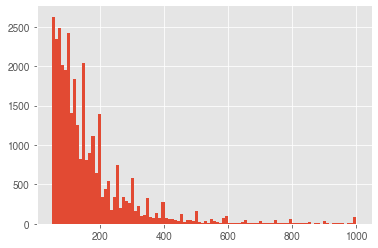

In [114]:
# prices are heavily right skewed 
listings2021['price'].hist(bins=100)

### `Total Number of Listings Per Year`

Contains no duplicates
Contains no duplicates
Contains no duplicates
Contains no duplicates
Contains no duplicates
Contains no duplicates


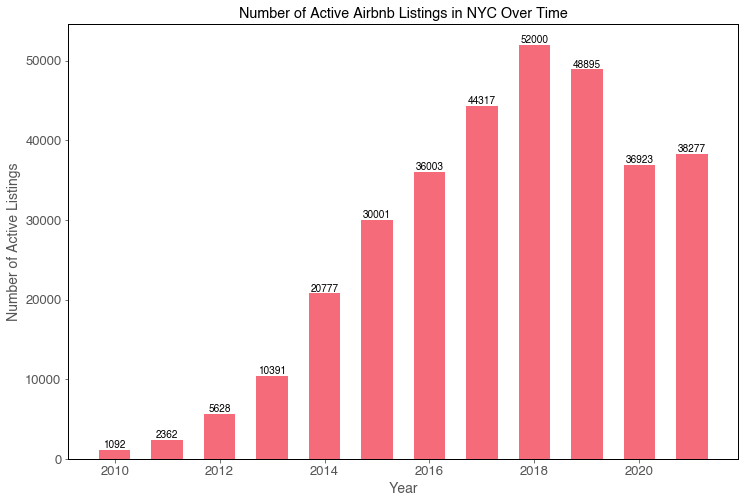

In [31]:
# previous years data 
listings2019 = pd.read_csv('data/NYC_2019.csv')
listings2017 = pd.read_csv('data/NYC_2017-10.csv')
listings2016 = pd.read_csv('data/NYC_2016-01.csv')
listings2015 = pd.read_csv('data/NYC_2015-08.csv')
listings2014 = pd.read_csv('data/NYC_2014-08.csv')

listings2021.columns = listings2021.columns.str.replace('id', 'listing_id')
listings2019.columns = listings2019.columns.str.replace('id', 'listing_id')
listings2017.columns = listings2017.columns.str.replace('id', 'listing_id')
listings2016.columns = listings2016.columns.str.replace('Unnamed: 0', 'listing_id')
listings2015.columns = listings2015.columns.str.replace('Unnamed: 0', 'listing_id')
listings2014.columns = listings2014.columns.str.replace('Unnamed: 0', 'listing_id')

# checking for duplicate listings for each year 
dataframes = [listings2014, listings2015, listings2016, listings2017, listings2019, listings2021]

def check_dupe(list):
    for i in list:
        if len(set(i['listing_id'])) == i.shape[0]:
            print('Contains no duplicates')
        else:
            print('There are duplicate listings')

check_dupe(dataframes)


# generating dataframe of total listings per year 
tot2014 = listings2014.shape[0]
tot2015 = listings2015.shape[0]
tot2016 = listings2016.shape[0]
tot2017 = listings2017.shape[0]
tot2019 = listings2019.shape[0]
tot2021 = listings2021.shape[0]


tot_listings = [1092, 2362, 5628, 10391,tot2014,tot2015,tot2016,tot2017,52000, tot2019,36923,tot2021]
year = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

def list_todict(list1, list2):
    dict = {}
    dict['year'] = list1
    dict['tot_listings'] = list2
    return dict 
 
listings_over_time = pd.DataFrame(list_todict(year, tot_listings))
listings_over_time.columns = ['Year', 'Active Listings']
listings_over_time 

# source: https://comptroller.nyc.gov/reports/the-impact-of-airbnb-on-nyc-rents/


# plotting 
plt.rcParams.update({"figure.figsize" : (12, 8),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})

fig, ax = plt.subplots(figsize=(12,8))
num_listings = listings_over_time['Active Listings']
year = listings_over_time['Year']
plt.bar(year, num_listings, color = '#F56B7A', width=0.6)
plt.title('Number of Active Airbnb Listings in NYC from 2010-2021')
ax.set_title('Number of Active Airbnb Listings in NYC Over Time')
plt.xlabel("Year", fontsize = 14)
plt.xticks(fontsize = 13)
plt.ylabel("Number of Active Listings", fontsize = 14)
plt.yticks(fontsize = 13)
plt.grid(False)
plt.bar_label(ax.containers[0])
plt.rcParams.update({'font.sans-serif':'Helvetica'})
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.show()

### `Visualizing Listing Location`

In [32]:
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import pandas as pd
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import plotly_express as px 

In [39]:
# All Airbnb Listings 

# geometry coordinates 
geometry = [Point(xy) for xy in zip(listings2021['longitude'], listings2021['latitude'])]
crs = {'init': 'epsg:4326'}
boroughs = gpd.read_file(geoplot.datasets.get_path('nyc_boroughs'))
gdf = gpd.GeoDataFrame(listings2021, crs=crs, geometry=geometry)  
gdf_new = gdf[['listing_id', 'name', 'price', 'neighbourhood_group_cleansed', 'geometry']]

# plotting 
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
fig = px.scatter_mapbox(
                        gdf_new, 
                        lat=gdf_new.geometry.y, 
                        lon=gdf_new.geometry.x, 
                        hover_name = 'neighbourhood_group_cleansed',
                        color_continuous_scale=px.colors.colorbrewer.RdYlBu[::-1],
                        size = 'listing_id',
                        size_max=3, 
                        zoom=10,
                        width = 1000,
                        height = 900
                    )
fig.show()

In [36]:
# geometry coordinates 
geometry = [Point(xy) for xy in zip(listings2021['longitude'], listings2021['latitude'])]
crs = {'init': 'epsg:4326'}
boroughs = gpd.read_file(geoplot.datasets.get_path('nyc_boroughs'))
gdf = gpd.GeoDataFrame(listings2021, crs=crs, geometry=geometry)  
gdf_new = gdf[['listing_id', 'name', 'price', 'neighbourhood_group_cleansed', 'geometry']]

# plotting 
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
fig = px.scatter_mapbox(
                        gdf_new, 
                        lat=gdf_new.geometry.y, 
                        lon=gdf_new.geometry.x, 
                        size='price', 
                        color='price', 
                        hover_name = 'neighbourhood_group_cleansed',
                        color_continuous_scale=px.colors.colorbrewer.RdYlBu[::-1],
                        size_max=15, 
                        zoom=10,
                        width = 1000,
                        height = 900
                    )
fig.show()

# px.colors.colorbrewer.swatches()

In [40]:
# converting price column 
reduced = listings2021[(listings2021.price <= 1000) & (listings2021.price >= 50)][['longitude', 'latitude', 'listing_id', 'name', 'price', 'neighbourhood_group_cleansed']]
reduced = reduced[reduced['neighbourhood_group_cleansed'].isin(['Manhattan', 'Brooklyn', 'Queens'])]

# geometry coordinates 
geometry = [Point(xy) for xy in zip(reduced['longitude'], reduced['latitude'])]
crs = {'init': 'epsg:4326'}
boroughs = gpd.read_file(geoplot.datasets.get_path('nyc_boroughs'))
gdf = gpd.GeoDataFrame(reduced, crs=crs, geometry=geometry)  
gdf_reduced = gdf[['listing_id', 'name', 'price', 'area', 'geometry']]

# plotting 
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
fig = px.scatter_mapbox(
                        gdf_reduced, 
                        lat=gdf_reduced.geometry.y, 
                        lon=gdf_reduced.geometry.x, 
                        size='price', 
                        color='price', 
                        hover_name = 'area',
                        color_continuous_scale=px.colors.colorbrewer.RdYlBu[::-1],
                        size_max=5, 
                        zoom=10,
                        width = 1000,
                        height = 900
                    )
fig.show()

# number of listings in reduced dataset 
reduced.count()


KeyError: "['area'] not in index"

### `Airbnb Listings by Borough`

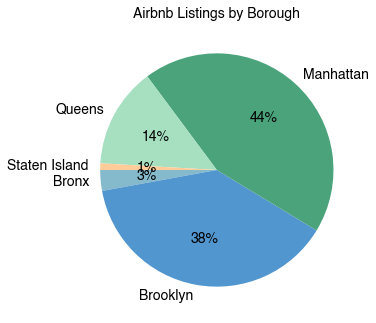

In [7]:
# Cleaning, reformatting columns 
np.sum(listings2021['host_since'].isnull())
pd.DatetimeIndex(listings2021['host_since']).year
listings2021 = listings2021.rename(columns = {"neighbourhood_group_cleansed": "area", \
                                               "neighbourhood_cleansed":"neighbourhood"})

# listings by borough 
areas = listings2021.groupby('area')[['listing_id']].count()
areas['sum'] = 38277
areas['proportion'] = round((areas['listing_id']/areas['sum'])*100,2)
areas_perc = areas[['listing_id','proportion']]

# Plot listings in each borough 
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,5))
fig.patch.set_facecolor('white')
plt.title("Airbnb Listings by Borough", fontsize = 14)
plt.rcParams.update({'font.sans-serif':'Helvetica'})
labels = 'Bronx','Brooklyn','Manhattan','Queens','Staten Island'
colors = ['#85bacc','#5196cf','#4ba37c','#a6e0c1','#ffcc99','#ffffbf']
g = plt.pie(areas.proportion, labels=labels, colors=colors, autopct='%1.0f%%', startangle=180)
plt.show()

### `Visualizing the Most Airbnb Dense Neighborhoods`

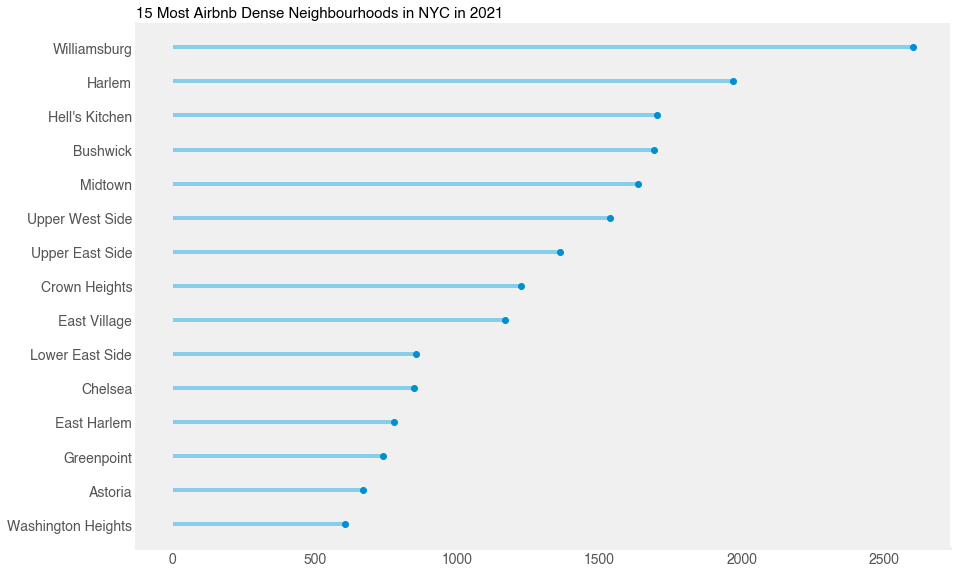

In [8]:
# listings broken down by neighbourhood
nbhd = listings2021.groupby('neighbourhood')[['listing_id']].count().sort_values('listing_id', ascending=False)
top15nbhd = nbhd.iloc[1:16].reset_index().sort_values('listing_id', ascending=True)
top15nbhd.columns = ['neighbourhood', 'count']
top15nbhd

#Plotting 
fig = plt.figure(figsize=(13,9))
fig.set_facecolor('white')
plt.title("15 Most Airbnb Dense Neighbourhoods in NYC in 2021", fontsize = 15, loc='left')
plt.rcParams.update({'font.sans-serif':'Helvetica',
                     'axes.facecolor':'white'})
plt.grid(False)
plt.hlines(y=top15nbhd['neighbourhood'], xmin = 0, xmax = top15nbhd['count'], color='skyblue')
plt.plot(top15nbhd['count'], top15nbhd['neighbourhood'], "o")
plt.show()

In [85]:
# Top 15 most Airbnb dense neighborhoods (legend listed from highest number of Airbnbs to lowest)
# Join 
top15nbhd2 = pd.merge(top15nbhd, listings2021, how='left', on='neighbourhood')
top15nbhd3 = top15nbhd2[top15nbhd2['area'].isin(['Manhattan', 'Brooklyn', 'Queens'])]

# geometry coordinates 
geometry = [Point(xy) for xy in zip(top15nbhd3['longitude'], top15nbhd3['latitude'])]
crs = {'init': 'epsg:4326'}
boroughs = gpd.read_file(geoplot.datasets.get_path('nyc_boroughs'))
gdf_nbhd = gpd.GeoDataFrame(top15nbhd3, crs=crs, geometry=geometry)  
gdf_nbhd = gdf_nbhd[['listing_id', 'name', 'price', 'count', 'neighbourhood','geometry']]
gdf_nbhd = gdf_nbhd.sort_values('count', ascending=False)

# # plotting 
px.set_mapbox_access_token("pk.eyJ1Ijoic2hha2Fzb20iLCJhIjoiY2plMWg1NGFpMXZ5NjJxbjhlM2ttN3AwbiJ9.RtGYHmreKiyBfHuElgYq_w")
fig = px.scatter_mapbox(
                        gdf_nbhd, 
                        lat=gdf_nbhd.geometry.y, 
                        lon=gdf_nbhd.geometry.x, 
                        color='neighbourhood',
                        size = 'price',
                        hover_name = 'neighbourhood',
                        color_discrete_sequence= ['#db7093', '#ffa07a', '#f0e68c', '#dc143c', '#F05D23', '#40C9A2', '#BA5A31', '#C6D8D3', '#3B78BD', '#35A7FF'\
                                                ,'#00A6A6', '#F49F0A', '#C490D1', '#B8336A', '#6153CC'],
                        size_max=15, 
                        zoom=10,
                        width = 1000,
                        height = 900
                    )
fig.show()

# px.colors.colorbrewer.swatches()

In [97]:
top15nbhd2.groupby('neighbourhood')[['listing_id']].count().reset_index().sort_values('listing_id', ascending=False)

neighbourhood  listing_id
14        Williamsburg        2603
7               Harlem        1971
8       Hell's Kitchen        1702
1             Bushwick        1693
10             Midtown        1635
12     Upper West Side        1538
11     Upper East Side        1362
3        Crown Heights        1225
5         East Village        1167
9      Lower East Side         854
2              Chelsea         847
4          East Harlem         777
6           Greenpoint         741
0              Astoria         669
13  Washington Heights         606

### `Distribution of Room Types`

In [10]:
# Majority (96%) of all active airbnb listings in 2021 were in Manhattan, Brooklyn, and Queens
listings2021.groupby(['room_type'])[['listing_id']].count()

listing_id
room_type                  
Entire home/apt       20397
Hotel room              210
Private room          17098
Shared room             572

In [11]:
# remove hotel room as room_type 
# room_types = listings2021[listings2021.room_type != 'Hotel room']
listings2021.groupby(['room_type'])[['listing_id']].count()
#listings2021.groupby(['room_type'])[['listing_id']].count().sum()

# entire home/apartment listings make up the majority of all airbnb listings in nyc 

listing_id
room_type                  
Entire home/apt       20397
Hotel room              210
Private room          17098
Shared room             572

In [27]:
# There are quite a few listings that have extremely low/high prices. Let's narrow down the listings and focus on listings between $50/night and $1000/night. 
room_types = listings2021[(listings2021.price <= 1000) & (listings2021.price >= 50)][['listing_id','room_type','price','neighbourhood', 'area', 'availability_365']].sort_values('price',ascending=False)
room_types.groupby(['room_type'])[['listing_id']].count()


listing_id
room_type                  
Entire home/apt       20077
Hotel room              168
Private room          13055
Shared room             320

In [13]:
# # Airbnb listing count by borough 
# listings2021.groupby(['area'])[['listing_id']].count()

In [14]:
# Number of listings excluded by the price filter 
print(listings2021[(listings2021.price > 1000)][['room_type']].count())
print(listings2021[listings2021.price < 50][['room_type']].count()) 

room_type    347
dtype: int64
room_type    4310
dtype: int64


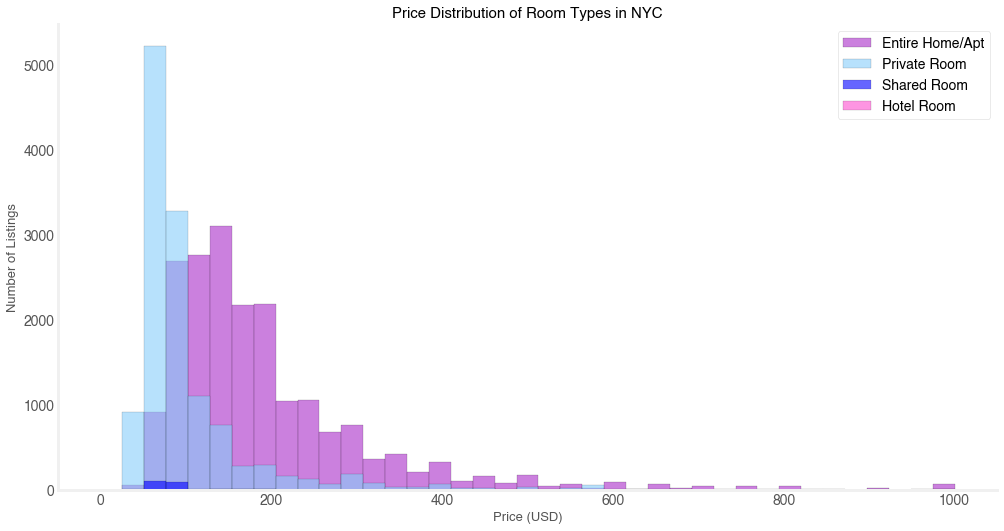

In [15]:
# Plotting room type distribution in NYC 
entire_home_price = room_types[room_types.room_type == 'Entire home/apt']['price'].tolist()
private_room = room_types[room_types.room_type == 'Private room']['price'].tolist()
shared_room = room_types[room_types.room_type == 'Shared room']['price'].tolist()
hotel_room = room_types[room_types.room_type == 'Hotel room']['price'].tolist() 


fig = plt.figure(figsize=(15,8))
plt.rcParams.update({"axes.facecolor" : "white"})
fig.set_facecolor('white')
bins = np.linspace(0, 1000, 40)
plt.hist(entire_home_price, bins, alpha=0.75, color = "mediumorchid", label="Entire Home/Apt", edgecolor='black', linewidth=0.2)
plt.hist(private_room, bins, alpha=0.6, color = "lightskyblue", label="Private Room", edgecolor='black', linewidth=0.2)
plt.hist(shared_room, bins, alpha=0.6, color = "blue", label="Shared Room", edgecolor='black', linewidth=0.2)
plt.hist(hotel_room, bins, alpha=0.6, color = "#fc4ed0", label="Hotel Room", edgecolor='black', linewidth=0.2)


plt.title('Price Distribution of Room Types in NYC', size = 15)
plt.xlabel('Price (USD)', size=13)
plt.ylabel("Number of Listings", size=13)
plt.legend()
plt.grid(False)

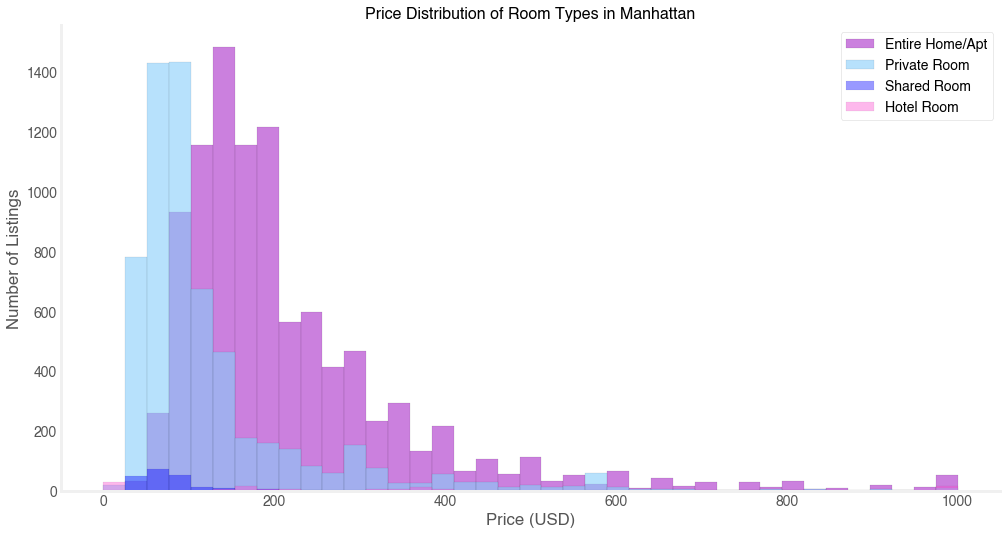

In [16]:
# PLotting room type distribution in Manhattan 
# manhattan = room_types[room_types.area == 'Manhattan']
# manhattan[['room_type','price','listing_id']].sort_values('price', ascending=False)

ma_entire_home_price = listings2021[(listings2021.room_type == 'Entire home/apt') & (listings2021.area == 'Manhattan')]['price'].tolist()
ma_private_room = listings2021[(listings2021.room_type == 'Private room') & (listings2021.area == 'Manhattan')]['price'].tolist()
ma_shared_room = listings2021[(listings2021.room_type == 'Shared room') & (listings2021.area == 'Manhattan')]['price'].tolist()
ma_hotel_room = listings2021[(listings2021.room_type == 'Hotel room') & (listings2021.area == 'Manhattan')]['price'].tolist() 

fig = plt.figure(figsize=(15,8))
plt.rcParams.update({"axes.facecolor" : "white"})
fig.set_facecolor('white')
bins = np.linspace(0, 1000, 40)
plt.hist(ma_entire_home_price, bins, alpha=0.75, color = "mediumorchid", label="Entire Home/Apt", edgecolor='black', linewidth=0.1)
plt.hist(ma_private_room, bins, alpha=0.6, color = "lightskyblue", label="Private Room", edgecolor='black', linewidth=0.1)
plt.hist(ma_shared_room, bins, alpha=0.4, color = "blue", label="Shared Room", edgecolor='black', linewidth=0.1)
plt.hist(ma_hotel_room, bins, alpha=0.4, color = "#fc4ed0", label="Hotel Room", edgecolor='black', linewidth=0.1)


plt.title('Price Distribution of Room Types in Manhattan',fontsize=16)
plt.xlabel('Price (USD)')
plt.ylabel('Number of Listings')
plt.legend()
plt.grid(False)

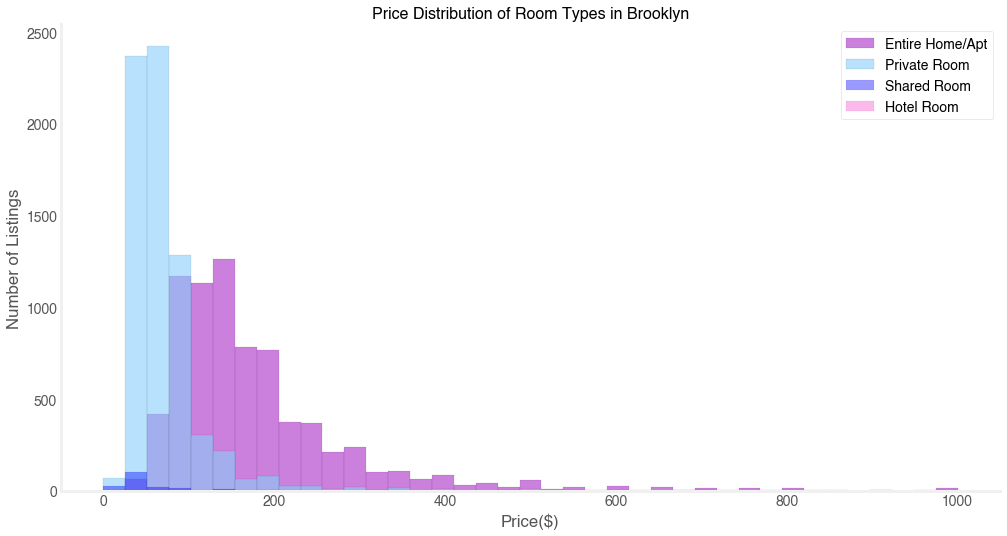

In [17]:
# Plotting room distribution in Brooklyn 
br_entire_home_price = listings2021[(listings2021.room_type == 'Entire home/apt') & (listings2021.area == 'Brooklyn')]['price'].tolist()
br_private_room = listings2021[(listings2021.room_type == 'Private room') & (listings2021.area == 'Brooklyn')]['price'].tolist()
br_shared_room = listings2021[(listings2021.room_type == 'Shared room') & (listings2021.area == 'Brooklyn')]['price'].tolist()
br_hotel_room = listings2021[(listings2021.room_type == 'Hotel room') & (listings2021.area == 'Brooklyn')]['price'].tolist()

fig = plt.figure(figsize=(15,8))
bins = np.linspace(0, 1000, 40)
plt.rcParams.update({"axes.facecolor" : "white"})
fig.set_facecolor('white')
plt.hist(br_entire_home_price, bins, alpha=0.75, color = "mediumorchid", label="Entire Home/Apt", edgecolor='black', linewidth=0.1)
plt.hist(br_private_room, bins, alpha=0.6, color = "lightskyblue", label="Private Room", edgecolor='black', linewidth=0.1)
plt.hist(br_shared_room, bins, alpha=0.4, color = "blue", label="Shared Room", edgecolor='black', linewidth=0.1)
plt.hist(br_hotel_room, bins, alpha=0.4, color = "#fc4ed0", label="Hotel Room", edgecolor='black', linewidth=0.1)


plt.title('Price Distribution of Room Types in Brooklyn',fontsize=16)
plt.xlabel('Price($)')
plt.ylabel('Number of Listings')
plt.legend()
plt.grid(False)

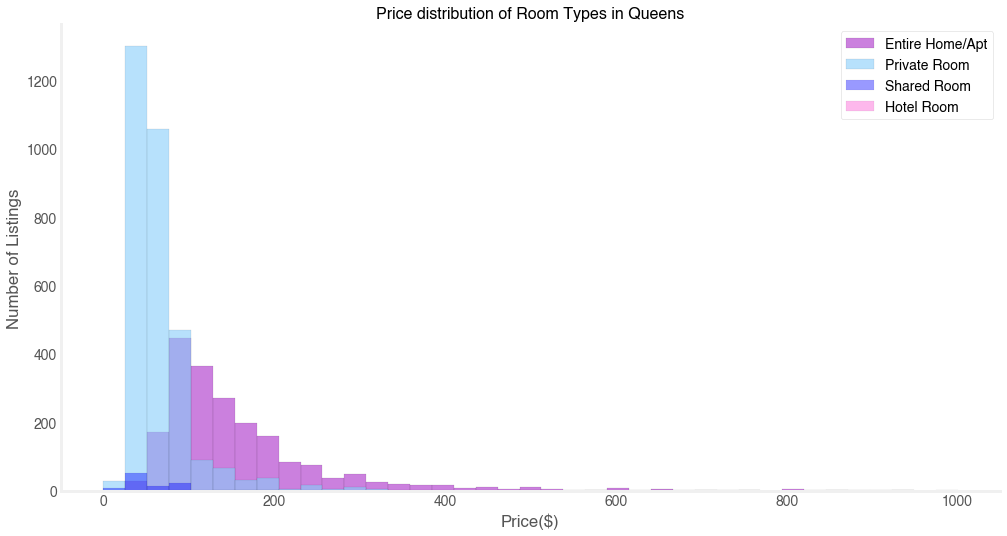

In [158]:
# Plotting room distribution in Queens 
qu_entire_home_price = listings2021[(listings2021.room_type == 'Entire home/apt') & (listings2021.area == 'Queens')]['price'].tolist()
qu_private_room = listings2021[(listings2021.room_type == 'Private room') & (listings2021.area == 'Queens')]['price'].tolist()
qu_shared_room = listings2021[(listings2021.room_type == 'Shared room') & (listings2021.area == 'Queens')]['price'].tolist()
qu_hotel_room = listings2021[(listings2021.room_type == 'Hotel room') & (listings2021.area == 'Queens')]['price'].tolist()

fig = plt.figure(figsize=(15,8))
bins = np.linspace(0, 1000, 40)
plt.rcParams.update({"axes.facecolor" : "white"})
fig.set_facecolor('white')
plt.hist(qu_entire_home_price, bins, alpha=0.75, color = "mediumorchid", label="Entire Home/Apt", edgecolor='black', linewidth=0.1)
plt.hist(qu_private_room, bins, alpha=0.6, color = "lightskyblue", label="Private Room", edgecolor='black', linewidth=0.1)
plt.hist(qu_shared_room, bins, alpha=0.4, color = "blue", label="Shared Room", edgecolor='black', linewidth=0.1)
plt.hist(qu_hotel_room, bins, alpha=0.4, color = "#fc4ed0", label="Hotel Room", edgecolor='black', linewidth=0.1)

plt.title('Price distribution of Room Types in Queens',fontsize=16)
plt.xlabel('Price($)')
plt.ylabel('Number of Listings')
plt.legend()
plt.grid(False)

[Text(0.5, 0, 'Room Type'), Text(0, 0.5, 'Price($)')]

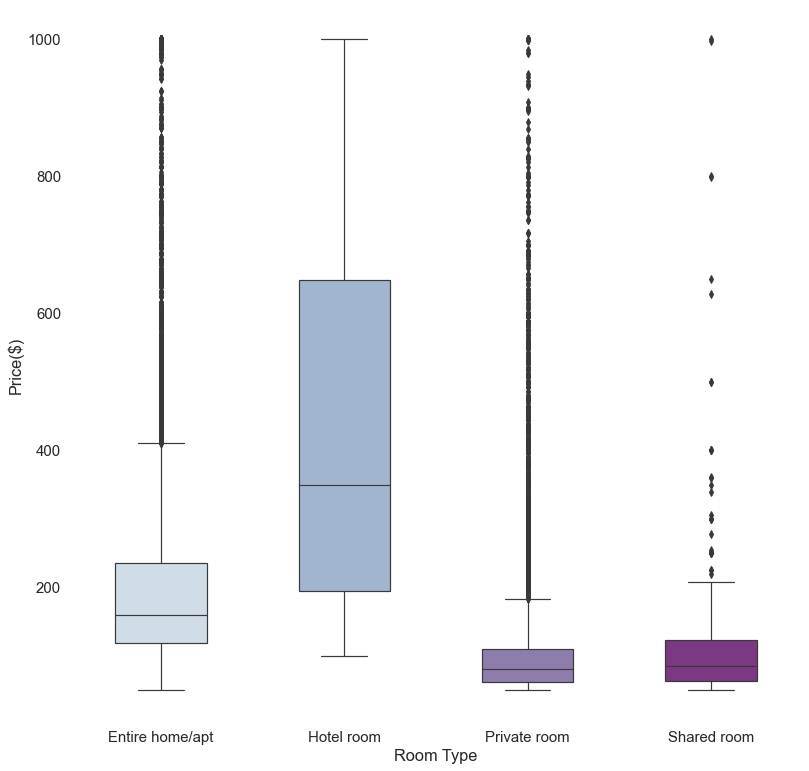

In [18]:
# Plotting comparison of median prices in NYC 
sns.set(rc={'figure.figsize':(11.7,12.27)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_context("paper", font_scale=1.7)                                                  
sns.boxplot(x = 'room_type', y = 'price', data = room_types, width = 0.5, palette = "BuPu")\
    .set(xlabel='Room Type', ylabel='Price($)')

AttributeError: 'list' object has no attribute 'set'

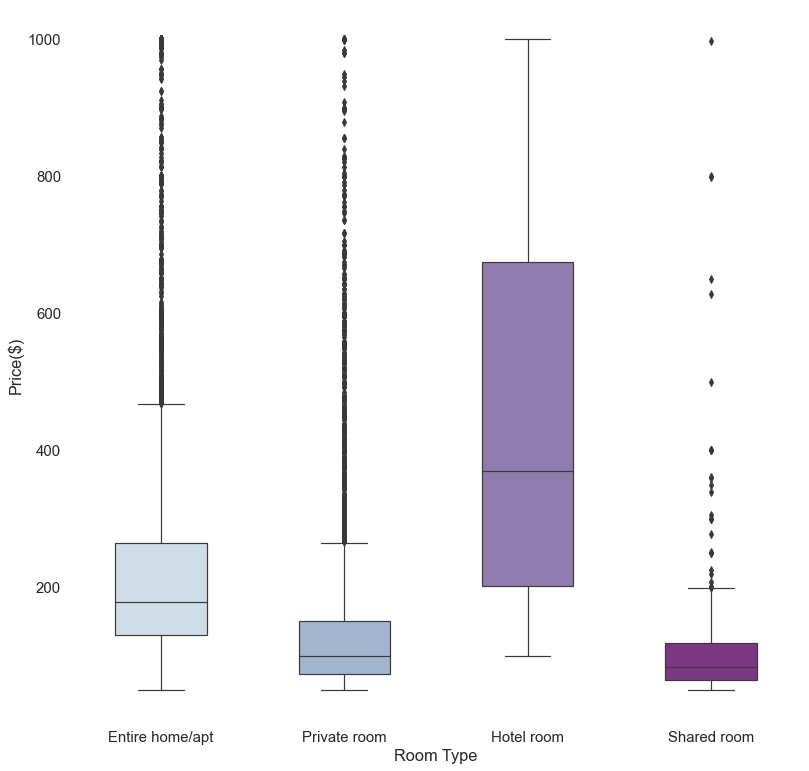

In [48]:
manhattan = room_types[(room_types.area == 'Manhattan')][['room_type','price']].sort_values('price',ascending=False)
sns.set(rc={'figure.figsize':(11.7,12.27)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_context("paper", font_scale=1.7)                                                  
sns.boxplot(x = 'room_type', y = 'price', data = manhattan, width = 0.5, palette = "BuPu")\
    .set(xlabel='Room Type', ylabel='Price($)')\
    .set(title='Room Type vs Price in Manhattan')


In [22]:
manhattan.groupby('room_type')[['price']].median()

price
room_type             
Entire home/apt  179.0
Hotel room       370.0
Private room      99.0
Shared room       83.5

AttributeError: 'list' object has no attribute 'set'

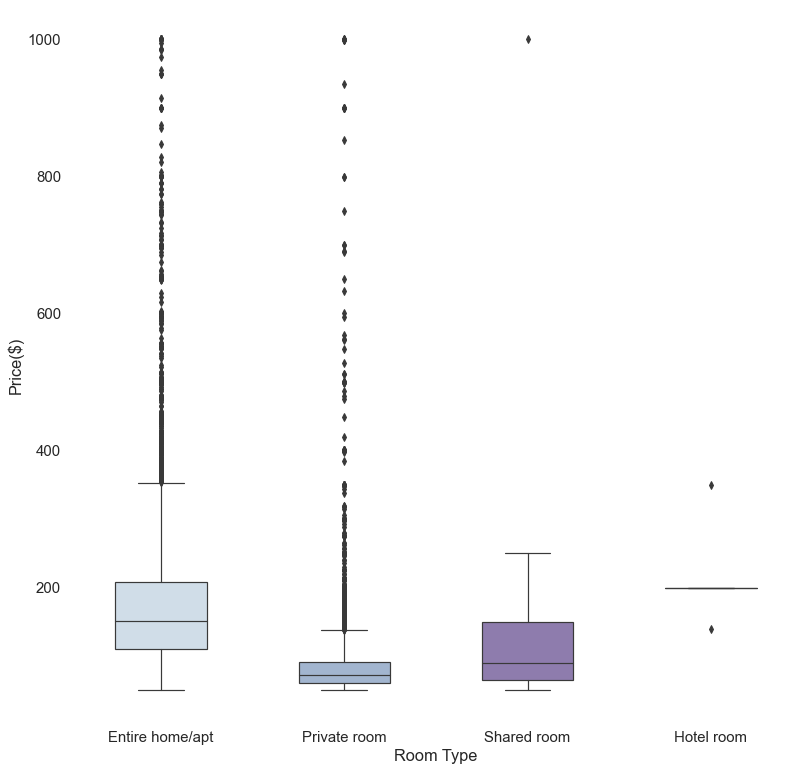

In [23]:
brooklyn = room_types[room_types.area == "Brooklyn"][['room_type','price']].sort_values('price',ascending=False)
sns.set(rc={'figure.figsize':(11.7,12.27)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_context("paper", font_scale=1.7)                                                  
sns.boxplot(x = 'room_type', y = 'price', data = brooklyn, width = 0.5, palette = "BuPu")\
    .set(xlabel='Room Type', ylabel='Price($)')\
    .set(title='Room Type vs Price in Brooklyn')


In [630]:
brooklyn.groupby('room_type')[['price']].median()

price
room_type             
Entire home/apt  150.0
Private room      61.0
Shared room       40.0

AttributeError: 'list' object has no attribute 'set'

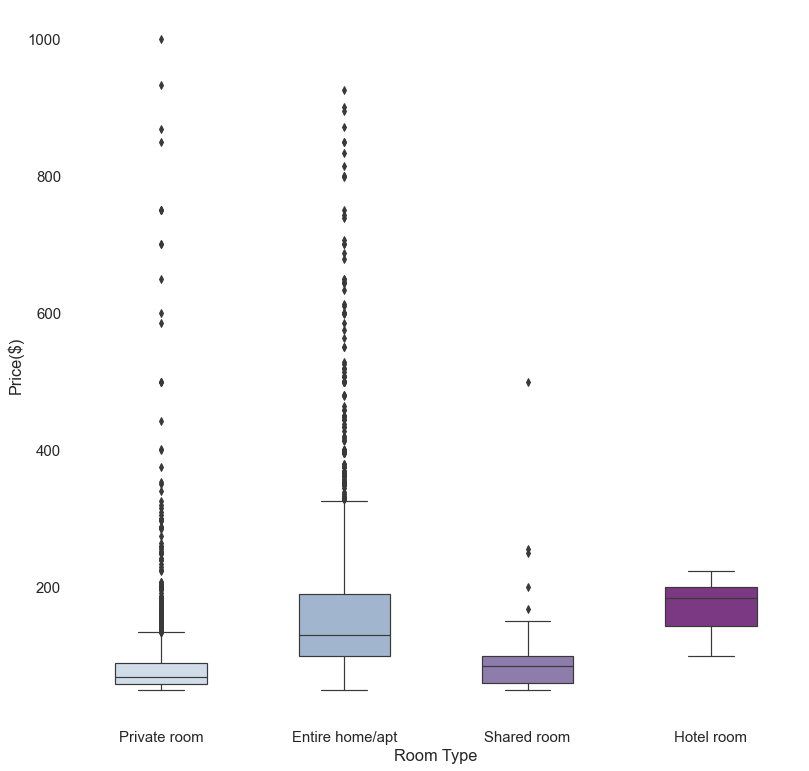

In [50]:
queens = room_types[room_types.area == "Queens"][['room_type','price']].sort_values('price',ascending=False)
qu_box = queens[["room_type","price"]]
qu_box
sns.set(rc={'figure.figsize':(11.7,12.27)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_context("paper", font_scale=1.7)                                                  
sns.boxplot(x = 'room_type', y = 'price', data = qu_box, width = 0.5, palette = "BuPu")\
    .set(xlabel='Room Type', ylabel='Price($)')\
    .set(title='Room Type vs Price in Queens')

In [631]:
queens.groupby('room_type')[['price']].median()

price
room_type             
Entire home/apt  130.0
Private room      56.0
Shared room       48.0

AttributeError: 'list' object has no attribute 'set'

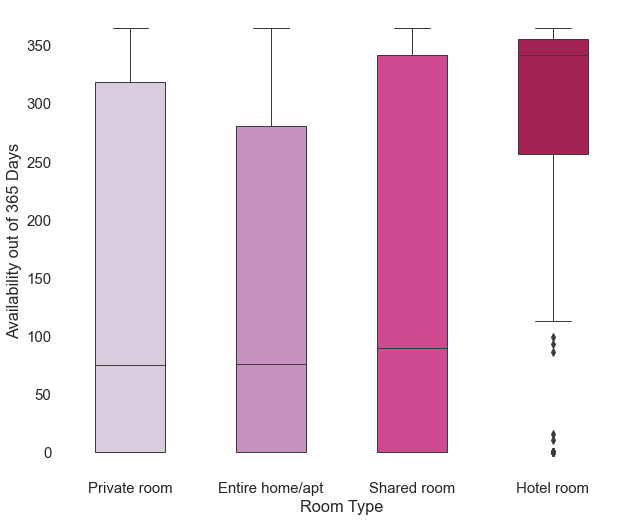

In [44]:
# availability throughout the year 

avail = room_types[["room_type","availability_365", "price"]].sort_values('price',ascending=True)
sns.set(rc={'figure.figsize':(9,8)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_context("paper", font_scale=1.7)                                                  
sns.boxplot(x = 'room_type', y = 'availability_365', data = avail, width = 0.5, linewidth = 1.0, palette = "PuRd")\
    .set(xlabel='Room Type', ylabel='Availability out of 365 Days')\
    .set(title='Room Type vs Year Availability')


# We can see that the median availabilities for each of the different room types is similar being around the 75
# day mark. 
# For all three room types, 25% of all listings are available for most of the year. For entire home/apt 
# listings, 25% of these listings are available for, roughly 275 days or more, making up most of the year.
# The other room types, 25% of these listings are being listed for an even greater proportion of the year. 
# So overall, it looks to be like a quarter of all airbnb listings are being used solely for that purpose. 

# Half of the listings seem to be available for only a small portion of the year, suggesting that hosts are 
# only making their apartment available for a portion of the year for whatever reason, whether it be for travel,
# business, etc. 


AttributeError: 'list' object has no attribute 'set'

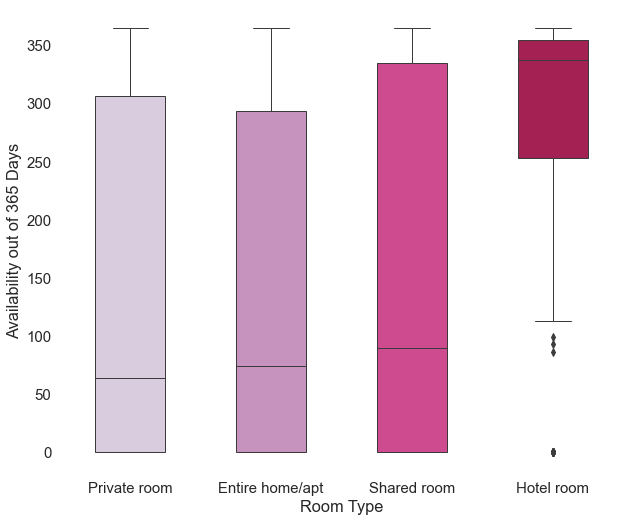

In [42]:
maavail = room_types[(room_types.area == 'Manhattan')][['room_type','availability_365', 'price']].sort_values('price',ascending=True)
sns.set(rc={'figure.figsize':(9,8)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_context("paper", font_scale=1.7)                                                  
sns.boxplot(x = 'room_type', y = 'availability_365', data = maavail, width = 0.5, linewidth = 1.0, palette = "PuRd")\
    .set(xlabel='Room Type', ylabel='Availability out of 365 Days')\
    .set(title='Room Type vs Year Availability')



AttributeError: 'list' object has no attribute 'set'

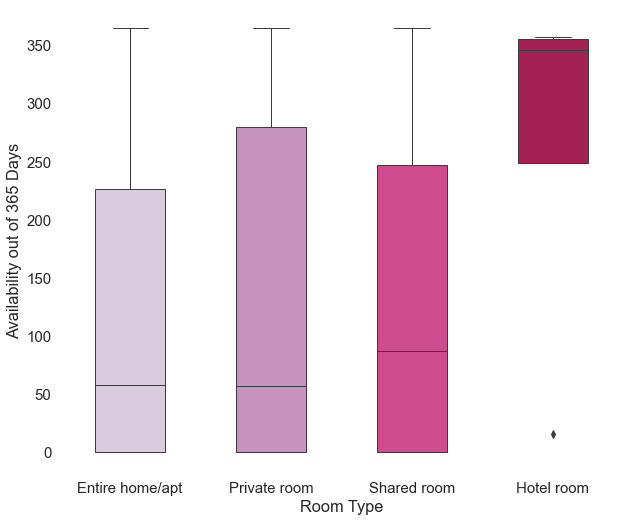

In [38]:
bravail = room_types[(room_types.area == 'Brooklyn')][['room_type','availability_365', 'price']].sort_values('price',ascending=False)
sns.set(rc={'figure.figsize':(9,8)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_context("paper", font_scale=1.7)                                                  
sns.boxplot(x = 'room_type', y = 'availability_365', data = bravail, width = 0.5, linewidth = 1.0, palette = "PuRd")\
    .set(xlabel='Room Type', ylabel='Availability out of 365 Days')\
    .set(title='Room Type vs Year Availability')



AttributeError: 'list' object has no attribute 'set'

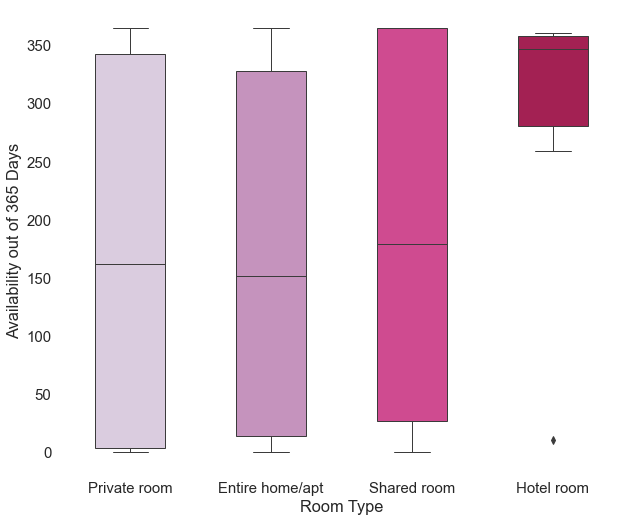

In [40]:
quavail = room_types[(room_types.area == 'Queens')][['room_type','availability_365', 'price']].sort_values('price',ascending=False)
sns.set(rc={'figure.figsize':(9,8)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_context("paper", font_scale=1.7)                                                  
sns.boxplot(x = 'room_type', y = 'availability_365', data = quavail, width = 0.5, linewidth = 1.0, palette = "PuRd")\
    .set(xlabel='Room Type', ylabel='Availability out of 365 Days')\
    .set(title='Room Type vs Year Availability')



In [641]:
manhattan_area.groupby('room_type')[['availability_365']].median()

availability_365
room_type                        
Entire home/apt              77.0
Private room                 63.0
Shared room                  90.0

In [642]:
brooklyn_area.groupby('room_type')[['availability_365']].median()

availability_365
room_type                        
Entire home/apt              58.0
Private room                 38.0
Shared room                  94.0

In [643]:
queens_area.groupby('room_type')[['availability_365']].median()

availability_365
room_type                        
Entire home/apt             151.0
Private room                 89.0
Shared room                 179.0

### `How Many Hosts Have Multiple Listings?`

In [195]:
host_df = listings2021.dropna(subset=['host_total_listings_count'])
host_df[['host_total_listings_count']].isnull().sum()
#remove rows that have na/null values  

In [371]:
host_df = listings2021.sort_values('host_total_listings_count', ascending=False).drop_duplicates('host_id').sort_index()
host_df = host_df[host_df.room_type != 'Hotel room']


In [373]:
host_df.host_total_listings_count = host_df.host_total_listings_count.replace(0,1)

In [374]:
host_df[["host_total_listings_count"]]

host_total_listings_count
1                            1.0
2                            1.0
3                            1.0
4                            1.0
5                            1.0
...                          ...
38259                        1.0
38260                        1.0
38264                        1.0
38269                        2.0
38276                      108.0

[25842 rows x 1 columns]

In [375]:
# checking validity of host_total_listings_count column 
host_df2 = listings2021.groupby("host_id")[["listing_id"]].count()

In [376]:
host_df2.sort_values("listing_id") #same number of row

listing_id
host_id              
2438                1
64109887            1
64091336            1
64076428            1
64060155            1
...               ...
51501835          177
3223938           180
158969505         201
107434423         308
305240193         421

[25904 rows x 1 columns]

In [377]:
host_df[(host_df.host_total_listings_count > 10)][['host_id','host_total_listings_count']]



# want to change values greater than 10 listings to "10+" 

host_id  host_total_listings_count
79        128669                       11.0
121       272006                       13.0
216       417504                       27.0
1692     8792814                       13.0
1757     7245581                       19.0
...          ...                        ...
37202  143759042                       24.0
37533   90713895                       15.0
38110   24132769                       19.0
38204  200239515                      131.0
38276   60105727                      108.0

[223 rows x 2 columns]

In [378]:
type(host_df['host_total_listings_count'][1])
# column is a float, must convert to string first 

numpy.float64

In [379]:
host_df['host_total_listings_count'] = host_df['host_total_listings_count'].astype(float)
type(host_df['host_total_listings_count'][1])

numpy.float64

In [655]:
hl = host_df[['host_id', 'host_total_listings_count', 'room_type','area']]
hl

hl['host_total_listings_count'] = hl['host_total_listings_count'].mask(hl['host_total_listings_count'] > 10, ">10")
hl

/var/folders/qh/9fbtqdtj7sz65vfz9d_xzqb80000gn/T/ipykernel_26502/876627937.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hl['host_total_listings_count'] = hl['host_total_listings_count'].mask(hl['host_total_listings_count'] > 10, ">10")


host_id host_total_listings_count        room_type       area
1           4869                       1.0  Entire home/apt   Brooklyn
2           7356                       1.0     Private room   Brooklyn
3           7378                       1.0  Entire home/apt   Brooklyn
4           8967                       1.0     Private room  Manhattan
5           7490                       1.0     Private room  Manhattan
...          ...                       ...              ...        ...
38259  293534030                       1.0  Entire home/apt  Manhattan
38260   57401970                       1.0  Entire home/apt  Manhattan
38264   87056606                       1.0  Entire home/apt  Manhattan
38269   99421256                       2.0  Entire home/apt      Bronx
38276   60105727                       >10  Entire home/apt   Brooklyn

[25842 rows x 4 columns]

In [656]:
host_count = hl.groupby(['host_total_listings_count'])[['host_id']].count()
host_count = host_count.reset_index()
host_count['host_total_listings_count'] = host_count['host_total_listings_count'].astype(str)
type(host_count['host_total_listings_count'][6])

str

In [657]:
host_count.head()

host_total_listings_count  host_id
0                       1.0    20402
1                       2.0     3202
2                       3.0     1038
3                       4.0      412
4                       5.0      201

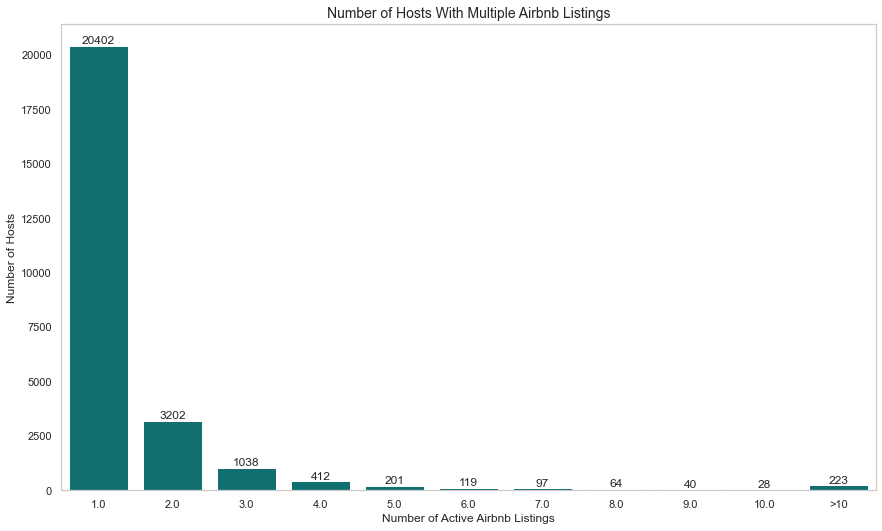

In [463]:
num_hosts = host_count['host_id']
num_lists = host_count['host_total_listings_count']

fig, ax = plt.subplots(figsize=(13,8))

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="host_total_listings_count", y="host_id", color ='teal', data=host_count)

ax.set_title('Number of Hosts With Multiple Airbnb Listings', fontsize=14)
plt.grid(False)
plt.bar_label(ax.containers[0])
plt.xlabel('Number of Active Airbnb Listings')
plt.ylabel("Number of Hosts")
plt.show()

In [670]:
manhattan_hostnum = hl[hl.area == 'Manhattan']
manhattan_hostnum
manhattan_hostnum = manhattan_hostnum.groupby(['host_total_listings_count'])[['host_id']].count()
manhattan_hostnum = manhattan_hostnum.reset_index()


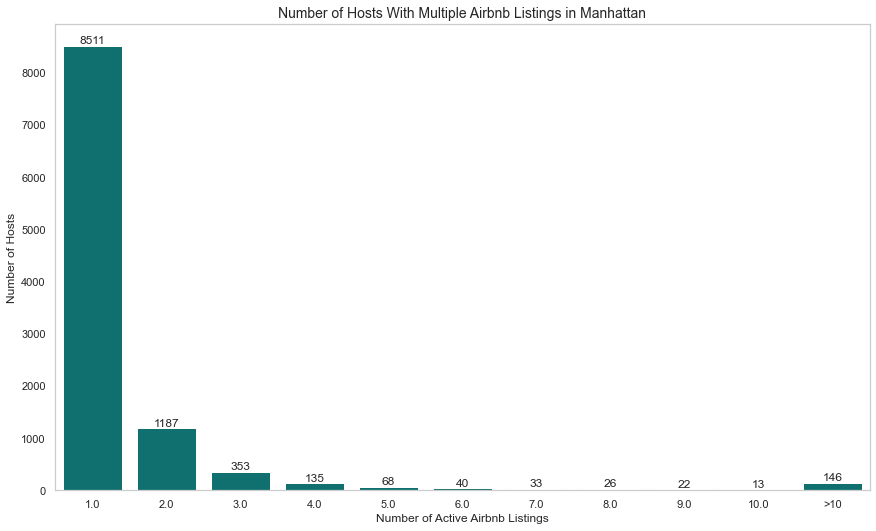

In [671]:
ma_num_hosts = manhattan_hostnum['host_id']
ma_num_lists = manhattan_hostnum['host_total_listings_count']

fig, ax = plt.subplots(figsize=(13,8))

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="host_total_listings_count", y="host_id", color ='teal', data=manhattan_hostnum)

ax.set_title('Number of Hosts With Multiple Airbnb Listings in Manhattan', fontsize=14)
plt.grid(False)
plt.bar_label(ax.containers[0])
plt.xlabel('Number of Active Airbnb Listings')
plt.ylabel("Number of Hosts")
plt.show()

In [672]:
brooklyn_hostnum = hl[hl.area == 'Brooklyn']
brooklyn_hostnum
brooklyn_hostnum = brooklyn_hostnum.groupby(['host_total_listings_count'])[['host_id']].count()
brooklyn_hostnum = brooklyn_hostnum.reset_index()


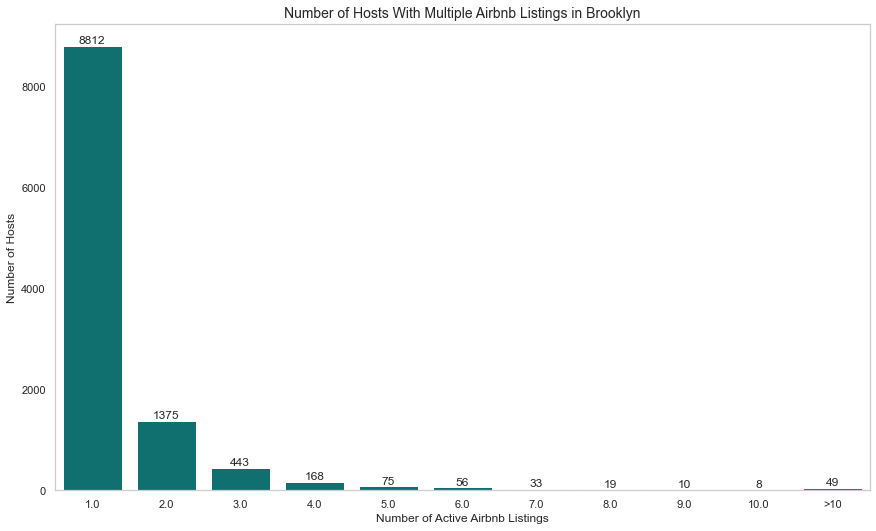

In [673]:
fig, ax = plt.subplots(figsize=(13,8))

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="host_total_listings_count", y="host_id", color ='teal', data=brooklyn_hostnum)

ax.set_title('Number of Hosts With Multiple Airbnb Listings in Brooklyn', fontsize=14)
plt.grid(False)
plt.bar_label(ax.containers[0])
plt.xlabel('Number of Active Airbnb Listings')
plt.ylabel("Number of Hosts")
plt.show()

In [674]:
queens_hostnum = hl[hl.area == 'Queens']
queens_hostnum
queens_hostnum = queens_hostnum.groupby(['host_total_listings_count'])[['host_id']].count()
queens_hostnum = queens_hostnum.reset_index()


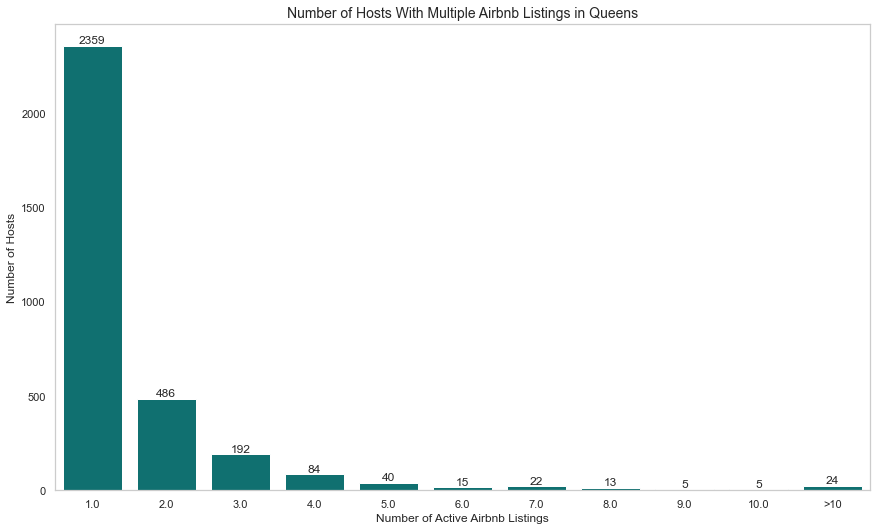

In [675]:
fig, ax = plt.subplots(figsize=(13,8))

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="host_total_listings_count", y="host_id", color ='teal', data=queens_hostnum)

ax.set_title('Number of Hosts With Multiple Airbnb Listings in Queens', fontsize=14)
plt.grid(False)
plt.bar_label(ax.containers[0])
plt.xlabel('Number of Active Airbnb Listings')
plt.ylabel("Number of Hosts")
plt.show()

### `Amenities and Price`

/var/folders/qh/9fbtqdtj7sz65vfz9d_xzqb80000gn/T/ipykernel_14063/2545429943.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/qh/9fbtqdtj7sz65vfz9d_xzqb80000gn/T/ipykernel_14063/2545429943.py:30: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



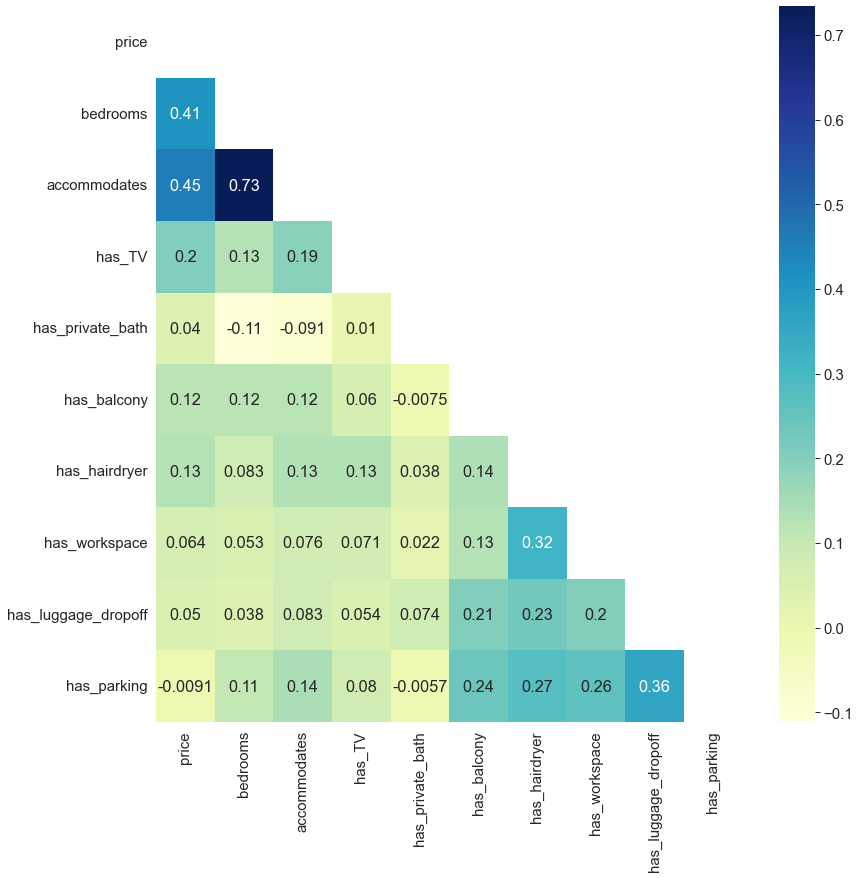

In [111]:
filtered_listings = filtered_listings[(listings2021.price <= 1000) & (listings2021.price >= 50)]
filtered_listings = filtered_listings[filtered_listings['area'].isin(['Manhattan', 'Brooklyn', 'Queens'])]

# amenities 
filtered_listings['has_TV'] = filtered_listings['amenities'].apply(lambda x: 1 if x.find("TV") != -1 else 0)
filtered_listings['has_parking'] = filtered_listings['amenities'].apply(lambda x: 1 if x.find("parking") != -1 else 0)
filtered_listings['has_luggage_dropoff'] = filtered_listings['amenities'].apply(lambda x: 1 if x.find("Luggage dropoff") != -1 else 0)
filtered_listings['has_workspace'] = filtered_listings['amenities'].apply(lambda x: 1 if x.find("workspace") != -1 else 0)
filtered_listings['has_hairdryer'] = filtered_listings['amenities'].apply(lambda x: 1 if x.find("Hair dryer") != -1 else 0)
filtered_listings['has_balcony'] = filtered_listings['amenities'].apply(lambda x: 1 if x.find("balcony") != -1 else 0)
filtered_listings['has_private_bath'] =  filtered_listings['bathrooms_text'].astype(str).apply(lambda x: 1 if x.find("private bath") != -1 else 0)

# counts 
filtered_listings.groupby('has_luggage_dropoff')[['listing_id']].count()
filtered_listings.groupby('has_workspace')[['listing_id']].count()
filtered_listings.groupby('has_hairdryer')[['listing_id']].count()
filtered_listings.groupby('has_balcony')[['listing_id']].count()
filtered_listings.groupby('has_private_bath')[['listing_id']].count()

# amenities dataframe 
has_amenities = filtered_listings[['price','bedrooms','accommodates','has_TV','has_private_bath','has_balcony','has_hairdryer','has_workspace','has_luggage_dropoff','has_parking']]
# has_amenities['price'] = has_amenities['price'].str.strip().str.replace(',', '').str.replace('$', '').astype(float)
has_amenities

#= filtered_listings[filtered_listings.room_type != 'Hotel room']


# amenities Pearson correlation matrix for Manhattan, Brooklyn and Queens 
corrMatrix = has_amenities.corr()
mask = np.triu(np.ones_like(has_amenities.corr(), dtype=np.bool))
sns.heatmap(corrMatrix, annot=True, cmap='YlGnBu', mask=mask)
plt.show()